Practice with Conditional Probabilities

[0.0, 0.5, 0.6666666666666666, 0.5, 0.4, 0.5, 0.42857142857142855, 0.375, 0.3333333333333333, 0.4, 0.36363636363636365, 0.4166666666666667, 0.38461538461538464, 0.42857142857142855, 0.4666666666666667, 0.4375, 0.4117647058823529, 0.4444444444444444, 0.42105263157894735, 0.4, 0.38095238095238093, 0.36363636363636365, 0.391304347826087, 0.375, 0.4, 0.38461538461538464, 0.4074074074074074, 0.39285714285714285, 0.41379310344827586, 0.43333333333333335, 0.41935483870967744, 0.4375, 0.42424242424242425, 0.4117647058823529, 0.42857142857142855, 0.4166666666666667, 0.40540540540540543, 0.39473684210526316, 0.38461538461538464, 0.4, 0.3902439024390244, 0.38095238095238093, 0.3953488372093023, 0.4090909090909091, 0.4, 0.391304347826087, 0.40425531914893614, 0.4166666666666667, 0.40816326530612246, 0.4, 0.39215686274509803, 0.38461538461538464, 0.37735849056603776, 0.3888888888888889, 0.38181818181818183, 0.375, 0.3684210526315789, 0.3620689655172414, 0.3559322033898305, 0.35, 0.3442622950819672,

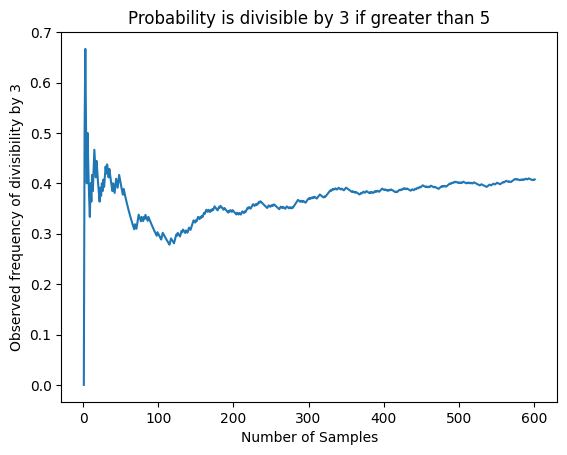

In [35]:
import matplotlib.pyplot as plt
import random as rnd
count = 0
over5 = 0
countProg =[]
n = 1000
for i in range(n):
    num = rnd.random()
    num = int((9*num)+1)
    if num >= 5:
        over5 += 1
        if num % 3 == 0:
            count += 1
        countProg.append(count/(over5))
print(countProg)
plt.plot(range(1,len(countProg) + 1), countProg)
plt.xlabel("Number of Samples")
plt.ylabel("Observed frequency of divisibility by 3")
plt.title("Probability is divisible by 3 if greater than 5")
plt.show()

Picking a Box then a Ball

1. 
P(Odd Box) * P(3 Chosen Given Odd Box)
(1/2) * (1/3) = 1/6

2. 
P(Odd Box) * P(1 Chosen Given Odd Box) + P(Even Box) * P(2 Chosen Even Odd Box) 
(1/2) * (1/3) + (1/2) * (1/2) = 5/12

3.
The distribution of {1,2,3,4,5} has the following probabilities: {1/6,1/4,1/6,1/4,1/6} 
A a uniform distribution would have the following probabilities: {1/5,1/5,1/5,1/5,1/5}

The reason for the difference is that the odd and even boxes have a different number of balls. Since the boxes have the same likelihood of being picked the individual balls in the even box have a higher chance of being selected because there are less options to choose from.

Based on the conditional probability formula you can write the following: 

P(Specific Odd Ball|Odd box chosen) = P(P(Specific Odd Ball and Odd box)/ P(Odd Box))
P(Specific Even Ball|Even box chosen) = P(P(Specific Even Ball and Even box)/ P(Even Box))

While the denominator in both these equations are 1/2 the numerators are different. A specific odd ball in the odd box has a 1/3 chance of being chosen while a speicifc even ball in the even box has a 1/2 chance of being chosen. This makes a specific odd ball less likely to be chosen then a specific even ball.

Fickle Monty Problem

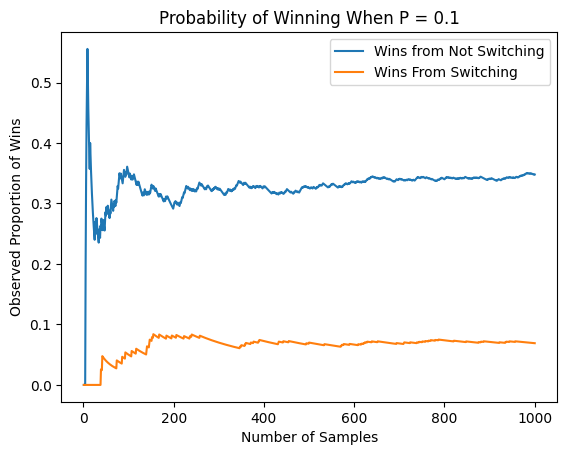

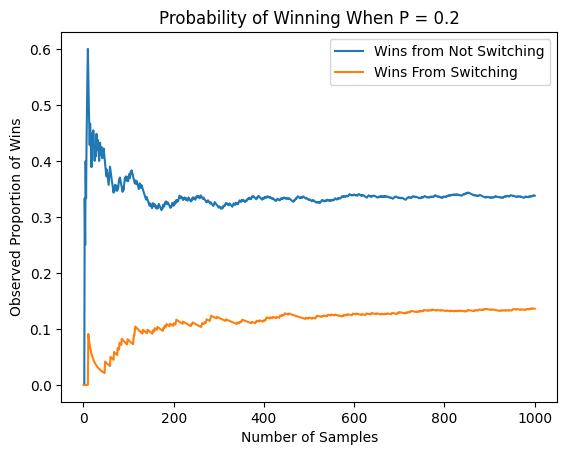

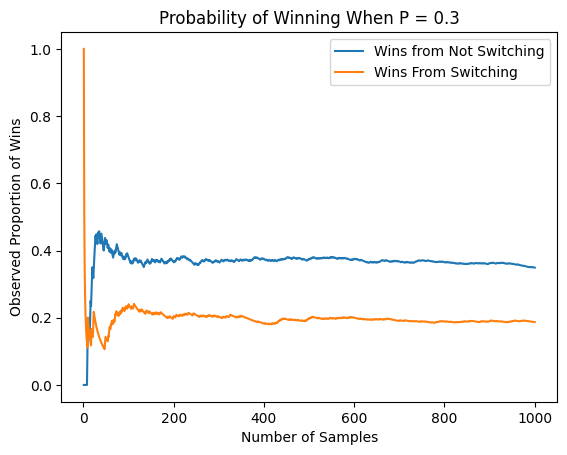

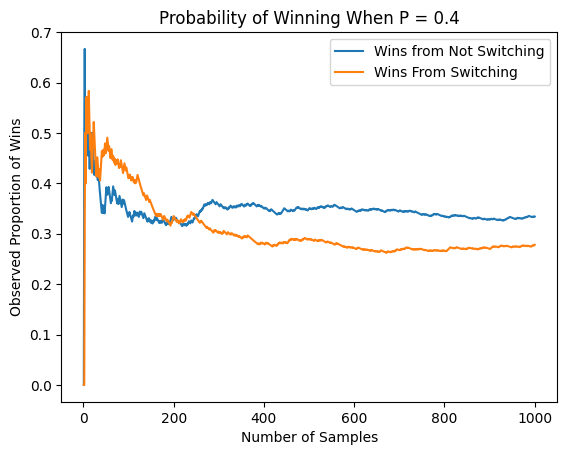

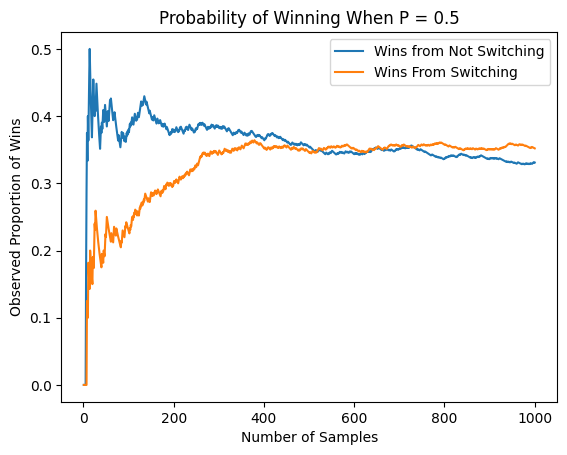

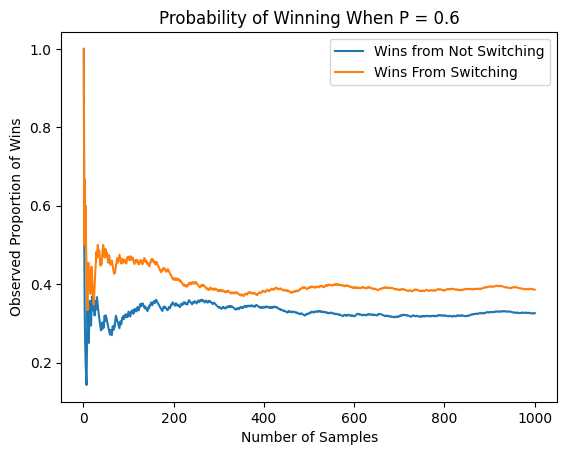

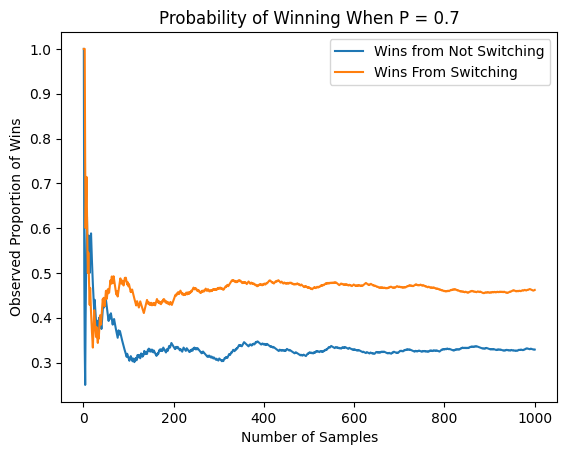

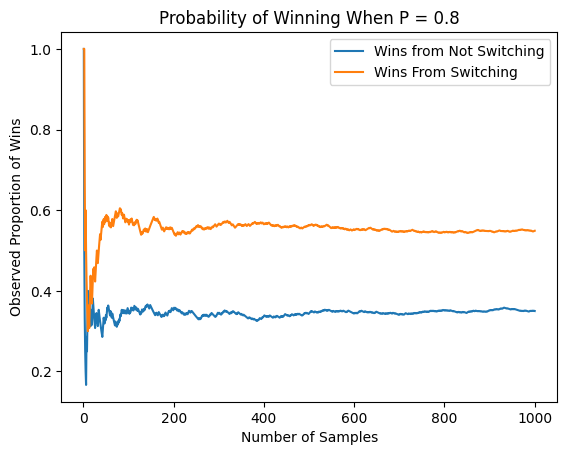

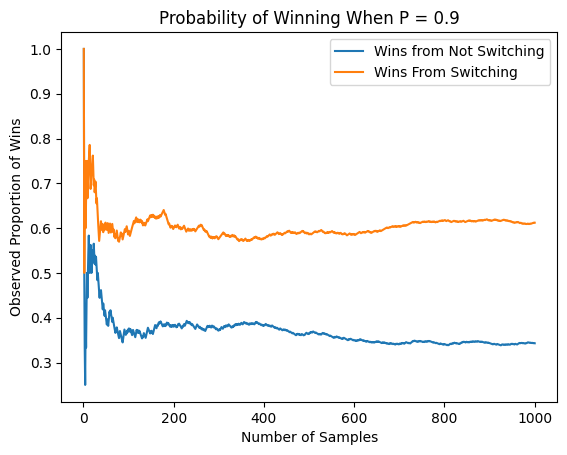

In [36]:
import random as rnd
import matplotlib.pyplot as plt

def setUpDoors(n):  # put goats behind all of the doors but one
    car_door = int(rnd.random()*n)  # unifrom 0 to n-1
    doors = []
    for i in range(n):
        if i == car_door:
            doors.append("Car")
        else:
            doors.append("Goat")
    return doors


def find_unif_random_goat_door(player_choice, doors):
    pick = int(rnd.random()*len(doors))
    while ((pick == player_choice) or (doors[pick] == "Car")):  
        # the above makes sure host not showing car or picking same door 
        pick = int(rnd.random()*len(doors))
    return pick  # We are using rejection sampling here


# An alternative version of the above function
def find_unif_random_goat_door2(player_choice, doors):  
    # get index of goats
    choices = set([i for i, x in enumerate(doors) if x == "Goat"]) 
    if player_choice in choices:  # remove players_choice if in list of goats
        choices.remove(player_choice)
    return rnd.choice(list(choices))  # from choices, pick a uniformly


def find_remaining_doors(choice_1, choice_2, n):
    choices = set(range(n))   # all door number {0,1,...,n-1}
    choices.remove(choice_1)  # remove one of the doors already taken
    choices.remove(choice_2)  # remove the other door already taken
    return list(choices)
    

def run_game_with_switch(n,fickle, verbose=True):  
    # set verbose=False to stop printing results
    doors = setUpDoors(n)
    # Pick uniformly from [0,1,2,...,n-1] for players initial choice
    player_first_choice = int(rnd.random()*n)

    
    
    if fickle:
        if doors[player_first_choice] == "Goat":
            return "Goat"
        
    # pick one of the goat doors  at random which is not the player door
    host_show_door = find_unif_random_goat_door(player_first_choice, doors)  

    
    

    # see which doors are left to choose from
    remianing_choices = find_remaining_doors(player_first_choice, 
                                             host_show_door, n)  
    
    # Pick one of the remaining doors uniformly at random
    new_choice = rnd.choice(remianing_choices)  
    
    # return both the new choice and the original choice
    return doors[new_choice]  


def run_game_with_no_switch(n,fickle, verbose=True):  
    # set verbose=False to stop printing results
    doors = setUpDoors(n)
    player_choice = int(rnd.random()*n)
    if fickle:
        if doors[player_choice] == "Goat":
            return "Goat"
    host_show_door = find_unif_random_goat_door(player_choice, doors)
    #print(f"Then the host shows door {host_show_door+1} which was a ", end="")
    #print(f"{doors[host_show_door]}")
    #print(f"Player keeps choice of door {player_choice+1} and wins a ", end="")
    #print(f"{doors[player_choice]}")
    return doors[player_choice]



n = 1000

for p in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    carsOverTimeNotSwitching = []
    cars = 0
    for i in range(n):
        num = rnd.random()
        if num < p:
            fickle = False
        else:
            fickle = True
        result = run_game_with_no_switch(3,fickle)
        if result == "Car":
            cars += 1
        carsOverTimeNotSwitching.append(cars/(i+1))

    carsOverTimeSwitching = []
    cars = 0
    for i in range(n):
        num = rnd.random()
        if num < p:
            fickle = False
        else:
            fickle = True
        result = run_game_with_switch(3,fickle)
        if result == "Car":
            cars += 1
        carsOverTimeSwitching.append(cars/(i+1))

    plt.plot(range(1,n+1), carsOverTimeNotSwitching)
    plt.plot(range(1,n+1), carsOverTimeSwitching)
    plt.xlabel("Number of Samples")
    plt.ylabel("Observed Proportion of Wins")
    plt.title(f"Probability of Winning When P = {p}")
    plt.legend(["Wins from Not Switching","Wins From Switching"])
    plt.show()


In [39]:
a = "123456789\n"
a+= "123456789"

print(a)

123456789
123456789
